In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:

# Define the paths to your data files
data_path = '../data/raw/'  # Adjust path as needed

orders = pd.read_csv('../data/raw/olist_orders_dataset.csv')
order_items = pd.read_csv('../data/raw/olist_order_items_dataset.csv')
customers = pd.read_csv('../data/raw/olist_customers_dataset.csv')
sellers = pd.read_csv('../data/raw/olist_sellers_dataset.csv')
products = pd.read_csv('../data/raw/olist_products_dataset.csv')
geolocation = pd.read_csv('../data/raw/olist_geolocation_dataset.csv')
reviews = pd.read_csv('../data/raw/olist_order_reviews_dataset.csv')

In [3]:
# Load all CSVs into a dictionary
dataframes = {}
for file in os.listdir(data_path):
    if file.endswith(".csv"):
        df_name = file.replace(".csv", "")
        dataframes[df_name] = pd.read_csv(os.path.join(data_path, file))
        print(f"{df_name} loaded with shape: {dataframes[df_name].shape}")

# Check loaded files
dataframes.keys()

olist_customers_dataset loaded with shape: (99441, 5)
olist_geolocation_dataset loaded with shape: (1000163, 5)
olist_orders_dataset loaded with shape: (99441, 8)
olist_order_items_dataset loaded with shape: (112650, 7)
olist_order_payments_dataset loaded with shape: (103886, 5)
olist_order_reviews_dataset loaded with shape: (99224, 7)
olist_products_dataset loaded with shape: (32951, 9)
olist_sellers_dataset loaded with shape: (3095, 4)
product_category_name_translation loaded with shape: (71, 2)


dict_keys(['olist_customers_dataset', 'olist_geolocation_dataset', 'olist_orders_dataset', 'olist_order_items_dataset', 'olist_order_payments_dataset', 'olist_order_reviews_dataset', 'olist_products_dataset', 'olist_sellers_dataset', 'product_category_name_translation'])

In [4]:
# Explore one dataset
df_orders = dataframes['olist_orders_dataset']
df_orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
print("Orders missing values:\n", orders.isnull().sum())
print("\nReviews missing values:\n", reviews.isnull().sum())

Orders missing values:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Reviews missing values:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


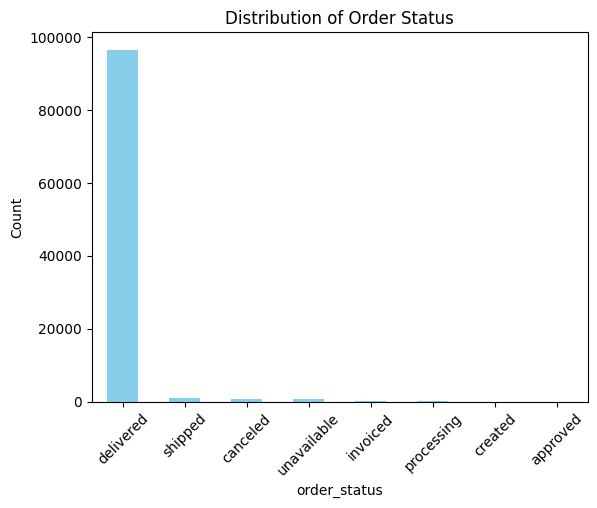

In [ ]:
# Order Status Distribution
orders['order_status'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Order Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Convert Timestamps to Datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])

# Check for Missing Values
print("Orders missing values:\n", orders.isnull().sum())
print("\nReviews missing values:\n", reviews.isnull().sum())

# Check for Duplicates
print("\nOrders duplicates:\n", orders.duplicated().sum())
print("\nReviews duplicates:\n", reviews.duplicated().sum())

C:\Users\asif\AppData\Local\Temp\ipykernel_12908\1055859126.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders.set_index('order_purchase_timestamp')['order_id'].resample('M').count().plot(figsize=(10,5))


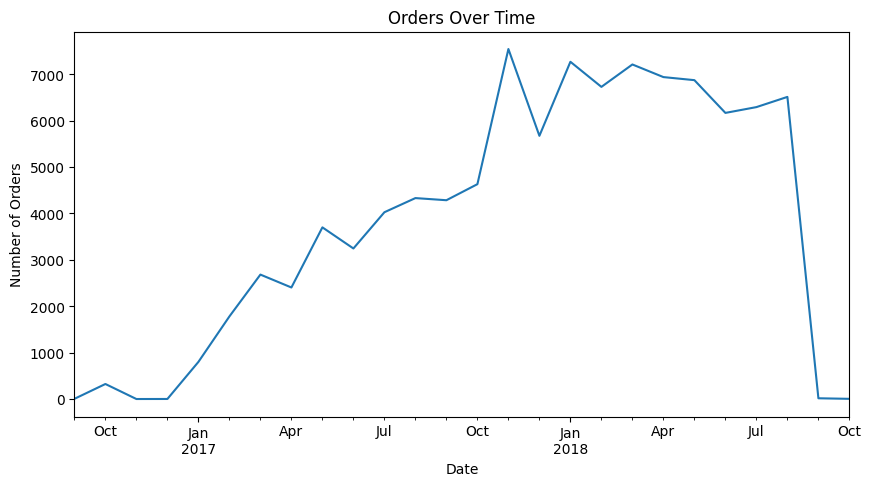

In [ ]:
 # Orders Over Time
orders.set_index('order_purchase_timestamp')['order_id'].resample('M').count().plot(figsize=(10,5))
plt.title("Orders Over Time")
plt.ylabel("Number of Orders")
plt.xlabel("Date")
plt.show()

C:\Users\asif\AppData\Local\Temp\ipykernel_12908\896678055.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=reviews, x='review_score', palette='viridis')


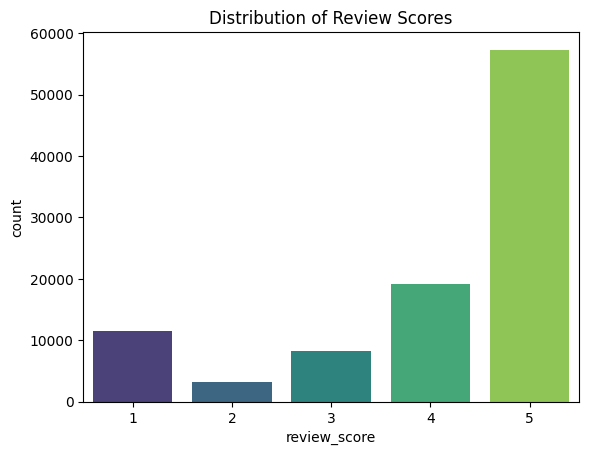

In [ ]:
# Review Score Distribution
sns.countplot(data=reviews, x='review_score', palette='viridis')
plt.title("Distribution of Review Scores")
plt.show()

In [7]:
print("Customers shape:", customers.shape)
print(customers.info(), "\n")

print("Orders shape:", orders.shape)
print(orders.info(), "\n")

print("Items shape:", order_items.shape)
print(order_items.info(), "\n")

print("Reviews shape:", reviews.shape)
print(reviews.info(), "\n")


Customers shape: (99441, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None 

Orders shape: (99441, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 

In [8]:
# Clean Orders
orders_clean = orders.dropna(subset=['order_purchase_timestamp'])
orders_clean['order_purchase_timestamp'] = pd.to_datetime(orders_clean['order_purchase_timestamp'])

# Clean Reviews
reviews_clean = reviews.dropna(subset=['review_score'])

# Clean Customers
customers_clean = customers.dropna(subset=['customer_id', 'customer_unique_id'])

# Clean Order Items
order_items_clean = order_items.dropna(subset=['order_id', 'price'])

# Save All Cleaned Files
orders_clean.to_csv('../data/raw/processed/orders_clean.csv', index=False)
reviews_clean.to_csv('../data/raw/processed/reviews_clean.csv', index=False)
customers_clean.to_csv('../data/raw/processed/customers_clean.csv', index=False)
order_items_clean.to_csv('../data/raw/processed/order_items_clean.csv', index=False)

print("✅ All 4 cleaned files saved under data/raw/processed/:")
print(" - orders_clean.csv")
print(" - reviews_clean.csv")
print(" - customers_clean.csv")
print(" - items_clean.csv")



✅ All 4 cleaned files saved under data/raw/processed/:
 - orders_clean.csv
 - reviews_clean.csv
 - customers_clean.csv
 - items_clean.csv
